# Guided Project: 
# Building a Handwritten Digits Classifier

## Created By: Dana Hagist

### Introduction:
In the last mission, we learned how adding hidden layers of neurons to a neural network can improve its ability to capture nonlinearity in the data. We tested different neural networks models on a dataset that we generated with deliberate nonlinearity.

In this Guided Project, we'll:

- explore why image classification is a hard task
- observe the limitations of traditional machine learning models for image classification
- train, test, and improve a few different deep neural networks for image classification

As we mentioned in the first mission in this course, deep neural networks have been used to reach state-of-the-art performance on image classification tasks in the last decade. For some image classification tasks, deep neural networks actually perform as well as or slightly better than the human benchmark. You can read about the history of deep neural networks here (https://arxiv.org/pdf/1803.01164.pdf).

To end this course, we'll build models that can classify handwritten digits. Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and more. One of their approaches, which consists of pre-processing handwritten images then feeding to a neural network model is detailed in this paper (http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.852.5499&rep=rep1&type=pdf).

#### Why is image classifcation a hard task?

Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

Second, images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.

Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256.

#### Why is deep learning effective in image classification?

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process. 

In this Guided Project, we'll explore the effectiveness of deep, feedforward neural networks at classifying images.

### Loading Data Set
Scikit-learn contains a number of datasets (https://scikit-learn.org/stable/datasets/index.html) pre-loaded with the library, within the namespace of sklearn.datasets. The load_digits() (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) function returns a copy of the hand-written digits dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) from UCI.

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

To reshape the image, we need to convert a training example to a numpy array (excluding the label column) and pass the result into that into the numpy.reshape() (https://www.dataquest.io/m/244/guided-project%3A-building-a-handwritten-digits-classifier/2/working-with-image-data) function:

    first_image = train.iloc[0]

    first_image = first_image.drop('label', axis=1)

    np_image = first_image.values

    np_image = np_image.reshape(28,28)

Now that the data is in the right shape, we can visualize it using pyplot.imshow() (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html?highlight=matplotlib%20pyplot%20imshow#matplotlib.pyplot.imshow) function:

    plt.imshow(np_image, cmap='gray_r')

To display multiple images in one matplotlib figure, we can use the equivalent axes.imshow() function. Let's use what we've learned to display images from both classes.

Task(s):

- Import load_digits() from the sklkearn.datasets package.
- Transform the NumPy 2D array into a pandas dataframe.
- Use matplotlib to visualize some of the images in the dataset.
    - Generate a scatter plot grid, with 2 rows and 4 columns.
    - In the first row:
        - Display the images corresponding to rows 0, 100, 200, and 300.
    - In the second row:
        - Display the images corresponding to rows 1000, 1100, 1200, and 1300.


In [12]:
# Solution(s):
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits_data = load_digits()

In [13]:
digits_data.keys()

dict_keys(['target_names', 'images', 'data', 'DESCR', 'target'])

In [14]:
labels = pd.Series(digits_data['target'])

In [15]:
data = pd.DataFrame(digits_data['data'])
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


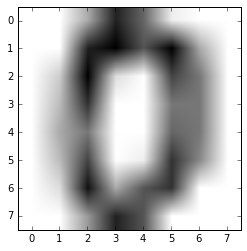

In [16]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

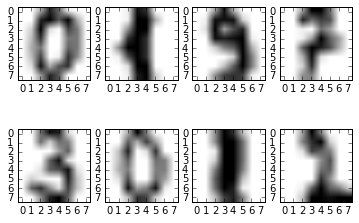

In [17]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

### Implementing K-Nearest Neighbors
While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. If you recall, k-nearest neighbors don't have a specific model representation (hence why it's referred to as an algorithm and not a model).

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

Recall that you can use the KNeighborsClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) package to train and test k-nearest neighbors models.

Task(s):
- Split up the data into train and test sets.
- Setup a pipeline for testing and training k-nn models.
    - Write a function named train() that uses KNeighborsClassifer for training k-nearest neighbors models.
    - Write a function named test() that tests the model.
    - Write a function named cross_validate() that performs 4-fold cross validation using train() and test().
- Experiment with different values for k and plot the resulting classification accuracies.

In [18]:
# Solution(s):
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# 50% Train / test validation
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
        
knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

0.9677233358079684

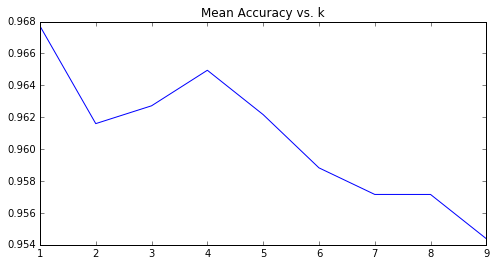

In [19]:
k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)

### Neural Network with One Hidden Layer
There are a few downsides to using k-nearest neighbors:
- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- no model representation to debug and explore

Let's now try a neural network with a single hidden layer. Use the MLPClassifier package from scikit-learn.

Task(s):

Using 4-fold cross validation:

- Train and test a neural network model using a single hidden layer of 8 neurons.
- Train and test a neural network model using a single hidden layer of 16 neurons.
- Train and test a neural network model using a single hidden layer of 32 neurons.
- Train and test a neural network model using a single hidden layer of 64 neurons.
- Train and test a neural network model using a single hidden layer of 128 neurons.
- Train and test a neural network model using a single hidden layer of 256 neurons.

Create a new Markdown cell summarizing what you saw.

- Rank the performance of the models by the overall accuracies.
- Which models, if any, start to overfit?
    - For each model, you could compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.

In [25]:
# Solution(s):
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

# 50% Train / test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


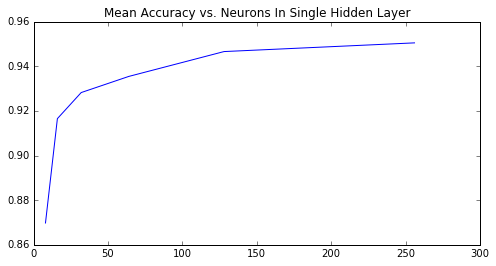

In [26]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

#### Summary:
It looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately 86% to approximately 94%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 96% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

### Neural Network with Two Hidden Layers

Using a neural network with a single hidden layer vastly improved the classification accuracy over k-nearest neighbors models.

Let's try using two hidden layers and continue to increase the number of neurons in each layer.

Task(s):
- Modify the neural network training pipeline to use 2 hidden layers instead in the network.
- Using 4-fold cross validation:
    - Train a neural network model using 2 hidden layers:
        - 64 neurons in the first hidden layer.
        - 64 neurons in the second hidden layer.
-Train a neural network model using 2 hidden layers:
    - 128 neurons in the first hidden layer.
    - 128 neurons in the second hidden layer.

Create a new Markdown cell summarizing what you saw.
- Rank the performance of the models by the overall accuracies.
- Which models, if any, start to overfit?
    - For each model, you could compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.

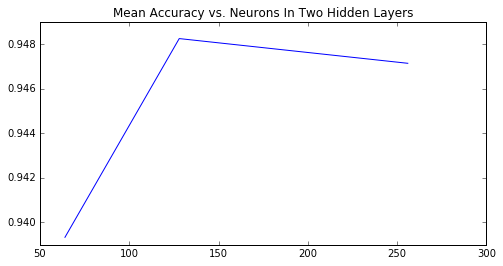

In [27]:
# Solution(s):
nn_two_neurons = [
    (64,64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

#### Summary:

Using 2 hidden layers improved our simple accuracy to 95%. While I'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

### Neural Network with 3 Hidden Layers
Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

Task(s):
- Modify the neural network training pipeline to use 6 fold cross validation instead.
- Train a neural network model using 3 hidden layers:
    - 10 neurons in the first hidden layer.
    - 10 neurons in the second hidden layer.
    - 10 neurons in the third hidden layer.
Train a neural network model using 3 hidden layers:
    - 64 neurons in the first hidden layer.
    - 64 neurons in the second hidden layer.
    - 64 neurons in the third hidden layer.
- Train a neural network model using 3 hidden layers:
    - 128 neurons in the first hidden layer.
    - 128 neurons in the second hidden layer.
    - 128 neurons in the third hidden layer.

Create a new Markdown cell summarizing what you saw.
- Rank the performance of the models by the overall accuracies.
- Which models, if any, start to overfit?
    - For each model, you could compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.

In [28]:
# Solution(s):
# 50% Train / test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate_six(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [ ]:
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate_six(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

#### Summary:
Using 3 hidden layers improved our simple accuracy to 96%, even with 6-fold cross validation. This seems to be in line with the research literature out there about deep neural networks for computer vision. Having more layers and more neurons tends to improve the network's performance.

### Conclusion
In this guided project, you experimented with different models to classify handwritten digits. That's it for the guided steps.

Here are some next steps to try:

- Use the existing pipeline you've built to try other machine learning models:
- Decision Tree Models
- Random Forest Models
- Write up a summary of the effectiveness of the different models you tried, with data to back up your conclusions.
- Experiment with different activation functions to see if the accuracies improve.
- Research some techniques for visualizing weights in neural network models and add a visualization step to your pipeline.
- Visualization of MLP Weights on MNIST

In future courses, we'd like to dive deeper into:

- Image classification and computer vision
- Higher performance tools for neural networks (like Tensorflow or PyTorch)
- Different neural network architectures (like Convolutional Neural Networks)